# Instacart Market Basket Basic Exploratory Analysis

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

## Explore Aisles Table

In [2]:
# Create dataframe from aisles csv file

aisles = pd.read_csv('/content/drive/MyDrive/archive/aisles.csv')

In [3]:
# Look at layout of aisles table

aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
# Info on data in aisles table

aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
# List all aisle names

[name for name in aisles.aisle]

['prepared soups salads',
 'specialty cheeses',
 'energy granola bars',
 'instant foods',
 'marinades meat preparation',
 'other',
 'packaged meat',
 'bakery desserts',
 'pasta sauce',
 'kitchen supplies',
 'cold flu allergy',
 'fresh pasta',
 'prepared meals',
 'tofu meat alternatives',
 'packaged seafood',
 'fresh herbs',
 'baking ingredients',
 'bulk dried fruits vegetables',
 'oils vinegars',
 'oral hygiene',
 'packaged cheese',
 'hair care',
 'popcorn jerky',
 'fresh fruits',
 'soap',
 'coffee',
 'beers coolers',
 'red wines',
 'honeys syrups nectars',
 'latino foods',
 'refrigerated',
 'packaged produce',
 'kosher foods',
 'frozen meat seafood',
 'poultry counter',
 'butter',
 'ice cream ice',
 'frozen meals',
 'seafood counter',
 'dog food care',
 'cat food care',
 'frozen vegan vegetarian',
 'buns rolls',
 'eye ear care',
 'candy chocolate',
 'mint gum',
 'vitamins supplements',
 'breakfast bars pastries',
 'packaged poultry',
 'fruit vegetable snacks',
 'preserved dips spreads

In [6]:
# One of the aisles was listed as missing. Keeping track of which one.

aisles[aisles['aisle'] == 'missing']

,aisle_id,aisle
99,100,missing


## Explore Departments Table

In [7]:
# Create dataframe from departments csv file

departments = pd.read_csv('/content/drive/MyDrive/archive/departments.csv')

In [8]:
# Look at layout of departments table

departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
# Info on data in departments table

departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [10]:
# List all department names

[name for name in departments.department]

['frozen',
 'other',
 'bakery',
 'produce',
 'alcohol',
 'international',
 'beverages',
 'pets',
 'dry goods pasta',
 'bulk',
 'personal care',
 'meat seafood',
 'pantry',
 'breakfast',
 'canned goods',
 'dairy eggs',
 'household',
 'babies',
 'snacks',
 'deli',
 'missing']

In [11]:
# One of the departments is listed as missing. Keeping track of which one.

departments[departments['department'] == 'missing']

,department_id,department
20,21,missing


## Explore Orders Table

In [12]:
# Create dataframe from orders csv file

orders = pd.read_csv('/content/drive/MyDrive/archive/orders.csv')

In [13]:
# Look at layout of orders table

orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [14]:
# Info on data in orders table

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [15]:
# Summary stats for orders table. Use lambda function to convert from scientific notation to float

orders.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3421083.000,3421083.000,3421083.000,3421083.000,3421083.000,3214874.000
mean,1710542.000,102978.208,17.155,2.776,13.452,11.115
std,987581.740,59533.718,17.733,2.047,4.226,9.207
min,1.000,1.000,1.000,0.000,0.000,0.000
25%,855271.500,51394.000,5.000,1.000,10.000,4.000
50%,1710542.000,102689.000,11.000,3.000,13.000,7.000
75%,2565812.500,154385.000,23.000,5.000,16.000,15.000
max,3421083.000,206209.000,100.000,6.000,23.000,30.000


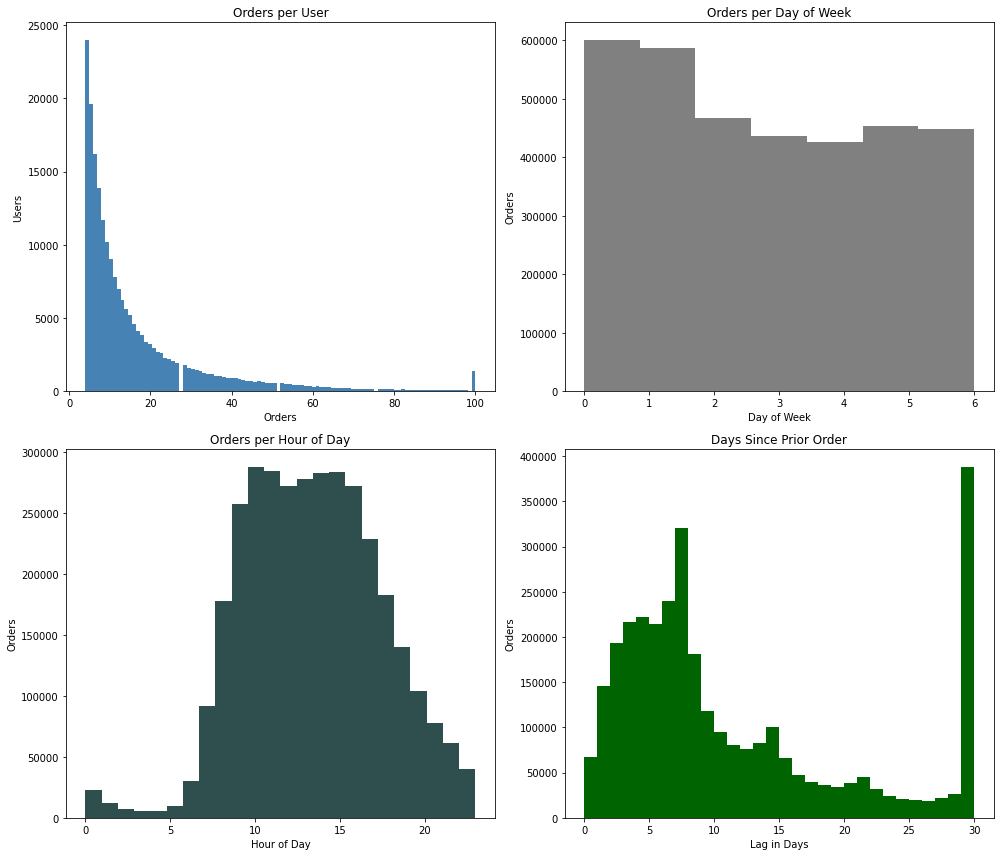

In [16]:
# Visualize Orders per User, Orders per Day of Week, Orders per Hour of Day, and Days Since Prior Order

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

ax0 = axes[0, 0]
ax0.hist(orders.user_id.value_counts(), bins = 100, color='steelblue')
ax0.set_title('Orders per User')
ax0.set_xlabel('Orders')
ax0.set_ylabel('Users')

ax1 = axes[0, 1]
ax1.hist(orders.order_dow, bins=7, color='gray')
ax1.set_title('Orders per Day of Week')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Orders')

ax2 = axes[1, 0]
ax2.hist(orders.order_hour_of_day, bins = 24, color='darkslategray')
ax2.set_title('Orders per Hour of Day')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Orders')

ax3 = axes[1, 1]
ax3.hist(orders.days_since_prior_order, bins = 30, color='darkgreen')
ax3.set_title('Days Since Prior Order')
ax3.set_xlabel('Lag in Days')
ax3.set_ylabel('Orders')

plt.tight_layout()
plt.savefig('summary_visualizations_orders.png', dpi=300, pad_inches=0.5)
plt.show()

### Orders per User

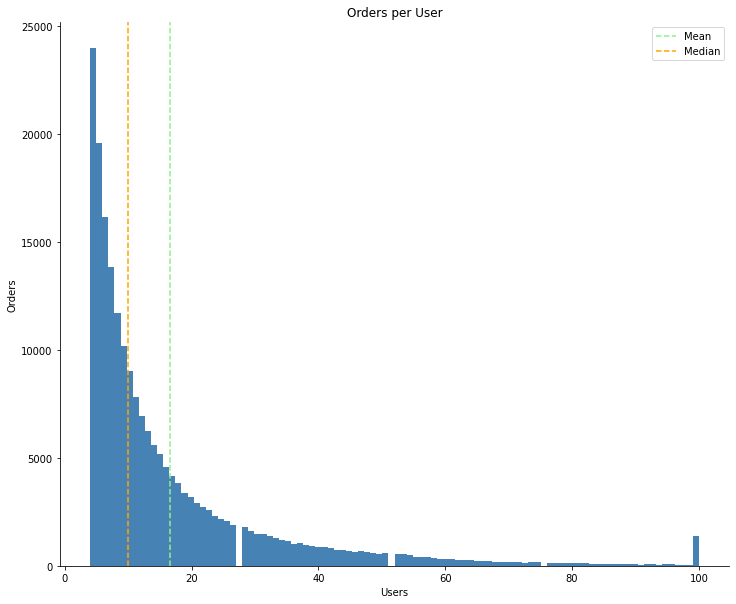

In [17]:
# Focus on Orders per User

plt.figure(figsize = (12, 10))
plt.hist(orders.user_id.value_counts(), bins = 100, color = 'steelblue')
plt.axvline(orders.user_id.value_counts().mean(), color = 'lightgreen', linestyle = '--', label = 'Mean')
plt.axvline(orders.user_id.value_counts().median(), color = 'orange', linestyle = '--', label = 'Median')
plt.title('Orders per User')
plt.xlabel('Users')
plt.ylabel('Orders')
plt.legend()
sns.despine()
plt.savefig('orders_per_user.png', dpi = 300, pad_inches = 0.5)
plt.show()

In [18]:
# Print Mean and Median for Orders per Customer

print('Mean orders per customer:', orders.user_id.value_counts().mean())
print('Median orders per customer:', orders.user_id.value_counts().median())

Mean orders per customer: 16.590367054784224
Median orders per customer: 10.0


### Orders per Day of Week

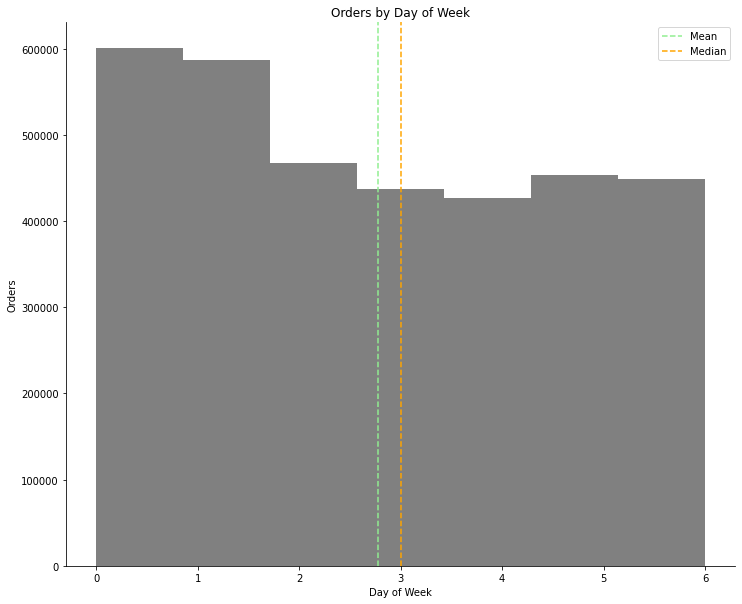

In [19]:
# Focus on Orders per Day of Week

plt.figure(figsize = (12, 10))
plt.hist(orders.order_dow, bins = 7, color = 'gray')
plt.axvline(orders.order_dow.mean(), color = 'lightgreen', linestyle = '--', label = 'Mean')
plt.axvline(orders.order_dow.median(), color = 'orange', linestyle = '--', label = 'Median')
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Orders')
plt.legend()
sns.despine()
plt.savefig('orders_per_dow.png', dpi = 300, pad_inches = 0.5)
plt.show()

In [20]:
# Print Mean and Median for Day of Order

print('Mean Day of Order:', orders.order_dow.mean())
print('Median Day of Order:', orders.order_dow.median())

Mean Day of Order: 2.7762191095626734
Median Day of Order: 3.0


### Orders per Hour of Day

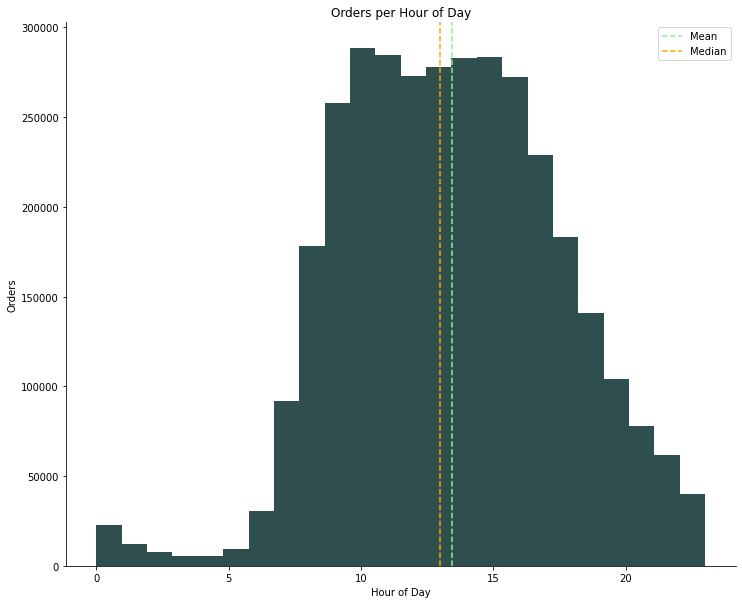

In [21]:
# Focus on Orders per Hour of Day

plt.figure(figsize = (12, 10))
plt.hist(orders.order_hour_of_day, bins = 24, color = 'darkslategray')
plt.axvline(orders.order_hour_of_day.mean(), color = 'lightgreen', linestyle = '--', label = 'Mean')
plt.axvline(orders.order_hour_of_day.median(), color = 'orange', linestyle = '--', label = 'Median')
plt.title('Orders per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Orders')
plt.legend()
sns.despine()
plt.savefig('orders_per_hour.png', dpi = 300, pad_inches = 0.5)
plt.show()

In [22]:
# Print Mean and Median for Hour of Order

print('Mean Hour of Order:', orders.order_hour_of_day.mean())
print('Median Hour of Order:', orders.order_hour_of_day.median())

Mean Hour of Order: 13.45201534134074
Median Hour of Order: 13.0


### Days Since Prior Order

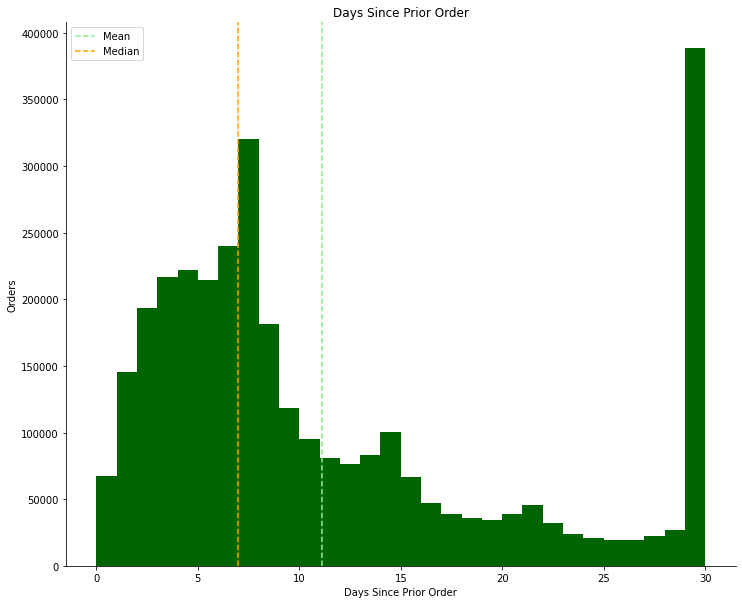

In [23]:
# Focus on Days Since Prior Order

plt.figure(figsize = (12, 10))
plt.hist(orders.days_since_prior_order, bins = 30, color = 'darkgreen')
plt.axvline(orders.days_since_prior_order.mean(), color = 'lightgreen', linestyle = '--', label = 'Mean')
plt.axvline(orders.days_since_prior_order.median(), color = 'orange', linestyle = '--', label = 'Median')
plt.title('Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Orders')
plt.legend()
sns.despine()
plt.savefig('days_since_prior_order.png', dpi = 300, pad_inches = 0.5)
plt.show()

In [24]:
# Print Mean and Median for Days Since Prior Order

print('Mean Days Since Prior Order:', orders.days_since_prior_order.mean())
print('Median Days Since Prior Order:', orders.days_since_prior_order.median())

Mean Days Since Prior Order: 11.114836226863012
Median Days Since Prior Order: 7.0


## Explore Products Table

In [25]:
# Create dataframe from products csv file

products = pd.read_csv('/content/drive/MyDrive/archive/products.csv')

In [26]:
# Look at layout of products table

products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [27]:
# Info on data in products table

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


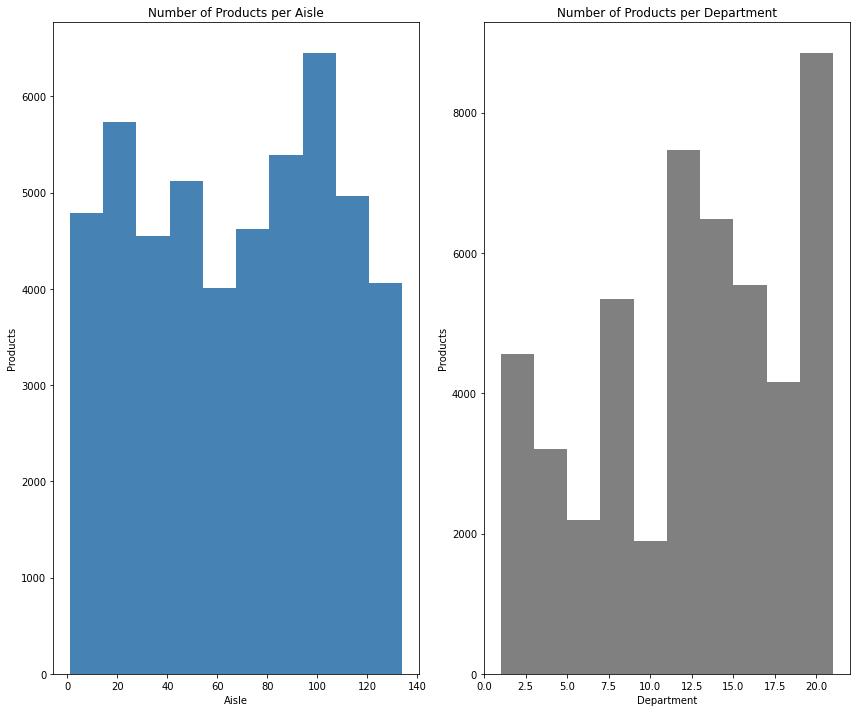

In [28]:
# Explore Products by Aisle and Department

fig, axes = plt.subplots(1, 2, figsize = (12, 10))

ax0 = axes[0]
ax0.hist(products.aisle_id, color='steelblue')
ax0.set_title('Number of Products per Aisle')
ax0.set_xlabel('Aisle')
ax0.set_ylabel('Products')

ax1 = axes[1]
ax1.hist(products.department_id, color='gray')
ax1.set_title('Number of Products per Department')
ax1.set_xlabel('Department')
ax1.set_ylabel('Products')

plt.tight_layout()
plt.savefig('products_by_aisle_department.png', dpi=300, pad_inches=0.5)
plt.show()

## Explore Order Products Prior Table

In [29]:
# Create dataframe from order_products_prior csv file

order_products_prior = pd.read_csv('/content/drive/MyDrive/archive/order_products__prior.csv')

In [30]:
# Look at layout of order_products_prior table

order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [31]:
# Info on data in order_products_prior table

order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [32]:
# Summary stats on order_products_prior table. Use lambda function to convert from scientific notation to float.

order_products_prior.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,order_id,product_id,add_to_cart_order,reordered
count,32434489.000,32434489.000,32434489.000,32434489.000
mean,1710748.519,25576.338,8.351,0.590
std,987300.696,14096.689,7.127,0.492
min,2.000,1.000,1.000,0.000
25%,855943.000,13530.000,3.000,0.000
50%,1711048.000,25256.000,6.000,1.000
75%,2565514.000,37935.000,11.000,1.000
max,3421083.000,49688.000,145.000,1.000


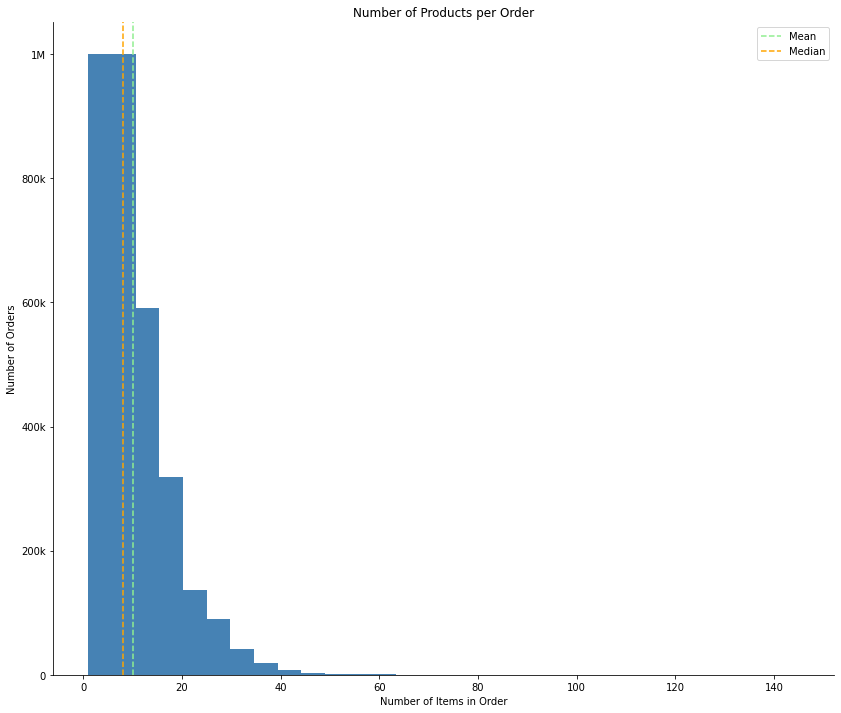

In [33]:
# Visualize distribution of number of products per order

plt.figure(figsize = (14, 12))
plt.hist(order_products_prior.order_id.value_counts(), bins = 30, color = 'steelblue')
plt.axvline(order_products_prior.order_id.value_counts().mean(), color = 'lightgreen', linestyle = '--', label = 'Mean')
plt.axvline(order_products_prior.order_id.value_counts().median(), color = 'orange', linestyle = '--', label = 'Median')
plt.title('Number of Products per Order')
plt.xlabel('Number of Items in Order')
plt.ylabel('Number of Orders')
plt.yticks([0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1.0e6], ['0', '200k', '400k', '600k', '800k', '1M'])
plt.legend()
sns.despine()
plt.savefig('products_per_order.png', dpi=300, pad_inches=0.5)
plt.show()

In [34]:
# Total number of orders

len(order_products_prior.order_id.value_counts())

3214874

In [35]:
# Use SQL to aggregate number of products per order

conn = sqlite3.connect('aisles_database.db')
order_products_prior.to_sql('order_products_prior', conn)
order_products_query = '''
  SELECT order_id, COUNT(product_id) AS product_total
  FROM order_products_prior
  GROUP BY order_id;
  '''

In [36]:
# Transform back into dataframe and view 

order_sizes_df = pd.read_sql(order_products_query, conn)
order_sizes_df.head()

,order_id,product_total
0,2,9
1,3,8
2,4,13
3,5,26
4,6,3


In [37]:
# Confirm that the total number of orders is still the same

len(order_sizes_df)

3214874

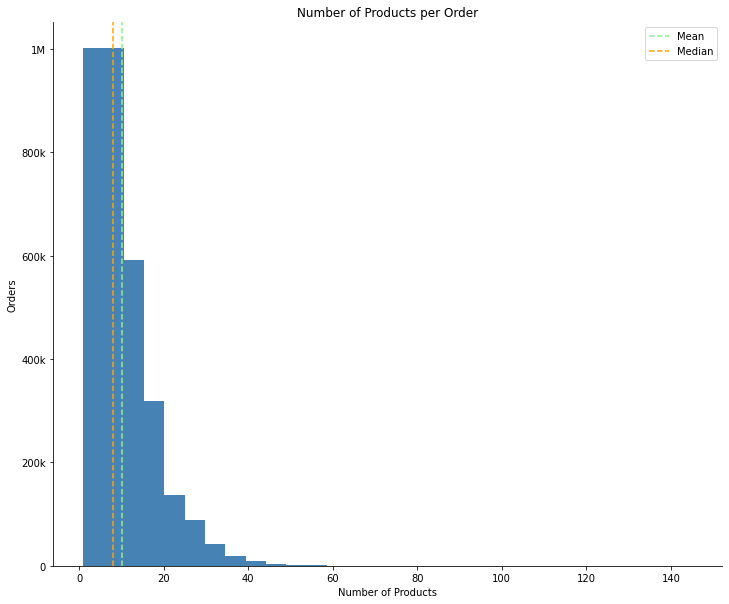

In [39]:
#Visualize Number of Products per Order

plt.figure(figsize = (12, 10))
plt.hist(order_sizes_df.product_total, bins = 30, color = 'steelblue')
plt.axvline(order_sizes_df.product_total.mean(), color = 'lightgreen', linestyle = '--', label = 'Mean')
plt.axvline(order_sizes_df.product_total.median(), color = 'orange', linestyle = '--', label = 'Median')
plt.title('Number of Products per Order')
plt.xlabel('Number of Products')
plt.ylabel('Orders')
plt.yticks([0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1.0e6], ['0', '200k', '400k', '600k', '800k', '1M'])
plt.legend()
sns.despine()
plt.savefig('number_products_per_order_prior.png', dpi = 300, pad_inches = 0.5)
plt.show()

In [40]:
# Print Mean and Median of Products per Order

print("Mean number of products per order:", order_sizes_df.product_total.mean())
print("Median number of products per order:", order_sizes_df.product_total.median())

Mean number of products per order: 10.088883421247614
Median number of products per order: 8.0


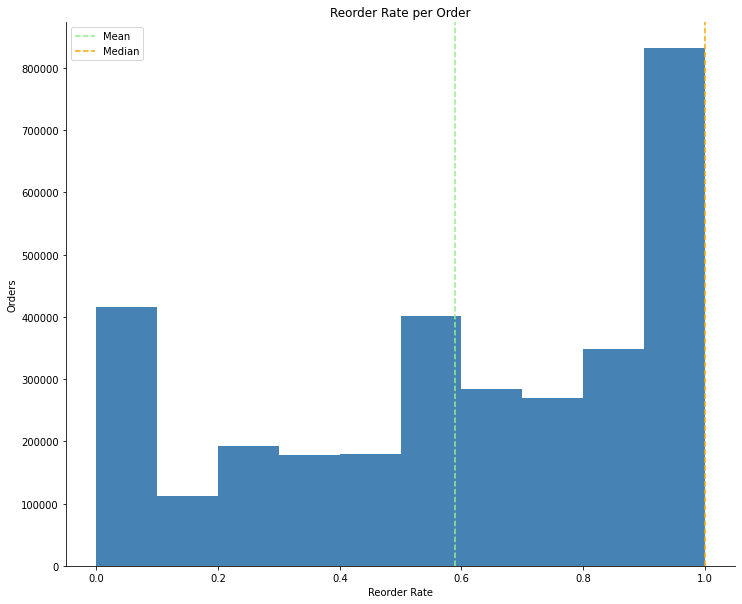

In [62]:
# Visualize Reorder Rate per Order

plt.figure(figsize = (12, 10))
plt.hist(order_products_prior.groupby('order_id')['reordered'].mean(), color='steelblue')
plt.axvline(order_products_prior.reordered.mean(), color = 'lightgreen', linestyle = '--', label = 'Mean')
plt.axvline(order_products_prior.reordered.median(), color = 'orange', linestyle = '--', label = 'Median')
plt.title('Reorder Rate per Order')
plt.xlabel('Reorder Rate')
plt.ylabel('Orders')
plt.legend()
sns.despine()
plt.savefig('reorder_rate_per_order.png', dpi=300, pad_inches=0.5)
plt.show()

In [43]:
# Print Mean and Median of Reorder Rate per Order

print("Mean number of products per order:", order_products_prior.reordered.mean())
print("Median number of products per order:", order_products_prior.reordered.median())

Mean number of products per order: 0.5896974667922161
Median number of products per order: 1.0


## Explore Order Products Train Table

In [44]:
# Create dataframe from order_products_train csv file

order_products_train = pd.read_csv('/content/drive/MyDrive/archive/order_products__train.csv')

In [45]:
# Look at layout of order_products_train table

order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [46]:
# Info on data in order_products_train table

order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [47]:
# Summary stats on order_products_train table. Use lambda function to convert from scientific notation to float.

order_products_train.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,order_id,product_id,add_to_cart_order,reordered
count,1384617.000,1384617.000,1384617.000,1384617.000
mean,1706297.621,25556.236,8.758,0.599
std,989732.649,14121.272,7.424,0.490
min,1.000,1.000,1.000,0.000
25%,843370.000,13380.000,3.000,0.000
50%,1701880.000,25298.000,7.000,1.000
75%,2568023.000,37940.000,12.000,1.000
max,3421070.000,49688.000,80.000,1.000


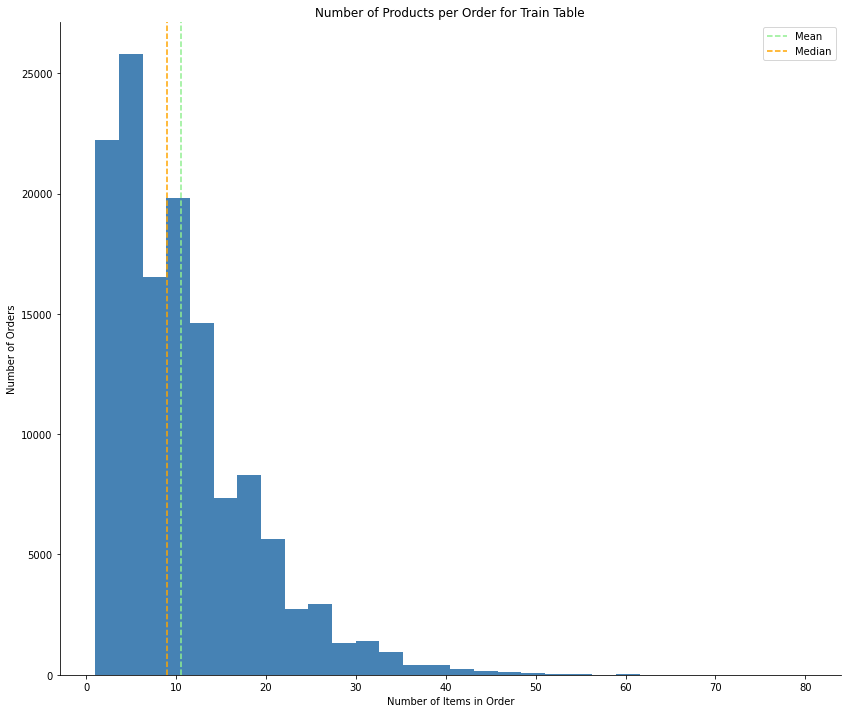

In [48]:
# Visualize distribution of number of products per order for train table

plt.figure(figsize = (14, 12))
plt.hist(order_products_train.order_id.value_counts(), bins = 30, color = 'steelblue')
plt.axvline(order_products_train.order_id.value_counts().mean(), color = 'lightgreen', linestyle = '--', label = 'Mean')
plt.axvline(order_products_train.order_id.value_counts().median(), color = 'orange', linestyle = '--', label = 'Median')
plt.title('Number of Products per Order for Train Table')
plt.xlabel('Number of Items in Order')
plt.ylabel('Number of Orders')
plt.legend()
sns.despine()
plt.savefig('number_products_per_order_train.png', dpi=300, pad_inches=0.5)
plt.show()

In [49]:
# Total number of orders

len(order_products_train.order_id.value_counts())

131209

In [54]:
# Use SQL to aggregate number of products per order

conn = sqlite3.connect('aisles_database.db')
order_products_train.to_sql('order_products_train', conn)
order_products_train_query = '''
  SELECT order_id, COUNT(product_id) AS product_total
  FROM order_products_train
  GROUP BY order_id;
  '''

In [55]:
# Transform back into dataframe and view 

order_sizes_train_df = pd.read_sql(order_products_train_query, conn)
order_sizes_train_df.head()

,order_id,product_total
0,1,8
1,36,8
2,38,9
3,96,7
4,98,49


In [56]:
# Confirm that the total number of orders is still the same

len(order_sizes_train_df)

131209

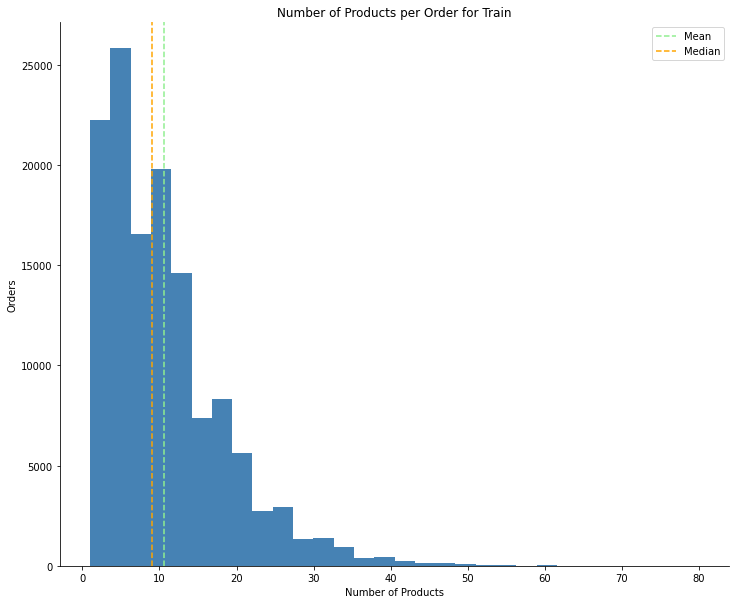

In [58]:
#Visualize Number of Products per Order for Train

plt.figure(figsize = (12, 10))
plt.hist(order_sizes_train_df.product_total, bins = 30, color = 'steelblue')
plt.axvline(order_sizes_train_df.product_total.mean(), color = 'lightgreen', linestyle = '--', label = 'Mean')
plt.axvline(order_sizes_train_df.product_total.median(), color = 'orange', linestyle = '--', label = 'Median')
plt.title('Number of Products per Order for Train')
plt.xlabel('Number of Products')
plt.ylabel('Orders')
plt.legend()
sns.despine()
plt.savefig('number_products_per_order_train_df.png', dpi = 300, pad_inches = 0.5)
plt.show()

In [59]:
# Print Mean and Median of Products per Order for Train

print("Mean number of products per order:", order_sizes_train_df.product_total.mean())
print("Median number of products per order:", order_sizes_train_df.product_total.median())

Mean number of products per order: 10.552759338155157
Median number of products per order: 9.0


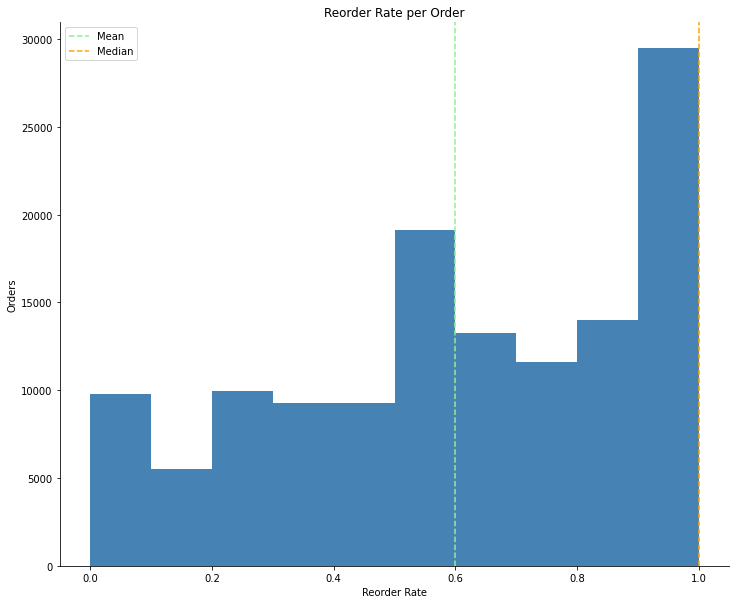

In [61]:
# Visualize Reorder Rate per Order for Train

plt.figure(figsize = (12, 10))
plt.hist(order_products_train.groupby('order_id')['reordered'].mean(), color='steelblue')
plt.axvline(order_products_train.reordered.mean(), color = 'lightgreen', linestyle = '--', label = 'Mean')
plt.axvline(order_products_train.reordered.median(), color = 'orange', linestyle = '--', label = 'Median')
plt.title('Reorder Rate per Order')
plt.xlabel('Reorder Rate')
plt.ylabel('Orders')
plt.legend()
sns.despine()
plt.savefig('reorder_rate_per_order_train.png', dpi=300, pad_inches=0.5)
plt.show()

In [63]:
# Print Mean and Median of Reorder Rate per Order for Train

print("Mean number of products per order:", order_products_train.reordered.mean())
print("Median number of products per order:", order_products_train.reordered.median())

Mean number of products per order: 0.5985944127509629
Median number of products per order: 1.0


## End of Preliminary Exploratory Analysis - Continue with Deeper Analysis in another Notebook